In [110]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [112]:
#filepath = 'data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'
filename = 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'
df = pd.read_csv(filename)
df.head(3)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278


In [113]:
df['Data_Value'] = df['Data_Value']*0.1
df['Year'] = df['Date'].apply(lambda x: x[:4])
df['Month-Day'] = df['Date'].apply(lambda x: x[5:])
df = df[df['Month-Day'] != '02-29']

#splitting the df in two
dfto14 = df[df['Year'] != '2015']
df15 = df[df['Year'] == '2015']

minto14 = dfto14.groupby(['Month-Day']).agg({'Data_Value':np.min})
maxto14 = dfto14.groupby(['Month-Day']).agg({'Data_Value':np.max})

min15 = df15.groupby(['Month-Day']).agg({'Data_Value':np.min})
max15 = df15.groupby(['Month-Day']).agg({'Data_Value':np.max})

#finding record breaking temperatures from 2015 per day
allmin = pd.merge(minto14.reset_index(), min15.reset_index(), how='inner', left_index=True, on='Month-Day')
allmax = pd.merge(maxto14.reset_index(), max15.reset_index(), how='inner', left_index=True, on='Month-Day')

recordmin = allmin[(allmin['Data_Value_y'] < allmin['Data_Value_x'])]
recordmax = allmax[(allmax['Data_Value_y'] > allmax['Data_Value_x'])]

#Converting to a list compatible to plt.fill_between()
fminto14 = []
for x in minto14['Data_Value']:
    fminto14.append(x)

fmaxto14 = []
for y in maxto14['Data_Value']:
    fmaxto14.append(y)

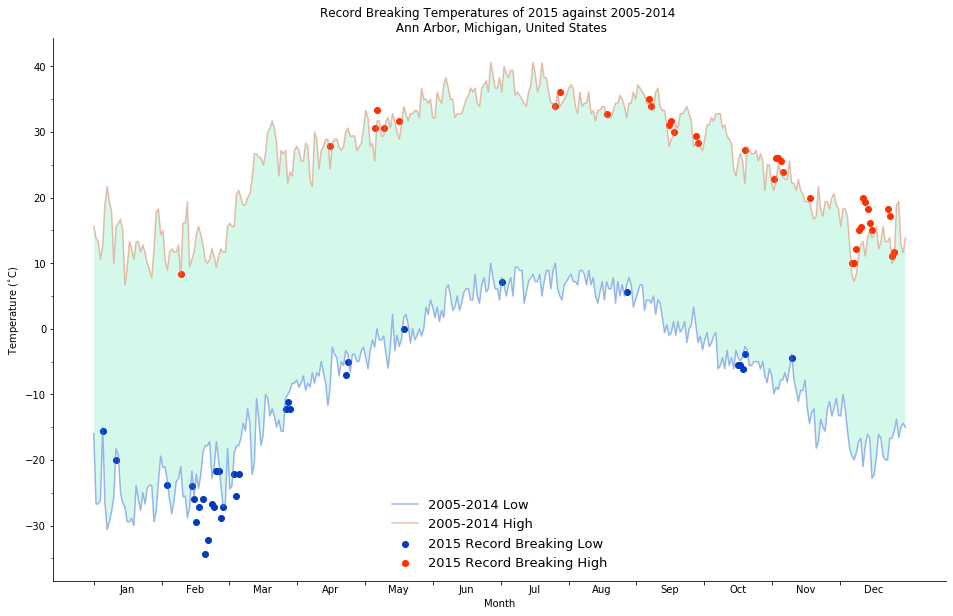

In [119]:
%matplotlib inline

plt.figure(figsize=(16,10))
ax = plt.gca()

plt.plot(minto14.values, color='#4570de', alpha=0.5, label='2005-2014 Low')
plt.plot(maxto14.values, color='#db7e5c', alpha=0.5, label='2005-2014 High')
plt.xlabel('Month')
plt.ylabel('Temperature $(^{\circ}$C)')
plt.title('Record Breaking Temperatures of 2015 against 2005-2014 \n Ann Arbor, Michigan, United States')
plt.fill_between(range(len(minto14)), fmaxto14, fminto14, facecolor='#28de95', alpha=0.2)

plt.scatter(recordmin.index.tolist(), recordmin['Data_Value_y'].values, c='#023abd', marker='o', label='2015 Record Breaking Low')
plt.scatter(recordmax.index.tolist(), recordmax['Data_Value_y'].values, c='#ff2f00', marker='o', label='2015 Record Breaking High')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 8, fontsize=13, frameon = False)

# Setting ticks on X-axis
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pos = np.arange(0, 365, 365/12)
pos2 = np.arange(15, 365, 365/12)

ax.set_xticks(pos)
ax.set_xticklabels('')
ax.set_xticks(pos2, minor=True)
ax.set_xticklabels(months, minor=True)
ax.tick_params(axis='x', which='minor', length=0)

# Setting ticks on Y-axis
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

plt.savefig('Assignment 2.png')